# Aim Which factor influenced a candidate in getting placed?
     Does percentage matters for one to get placed?
     Which degree specialization is much demanded by corporate?
     all statistical tests.

In [69]:
#import all the necessary Libraries


In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score
 

In [3]:
#Data
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Data dictionary

1.sl_no : Serial Number,

2.ssc_p : Secondary Education percentage- 10th Grade

3.ssc_b : Board of Education- Central/ Others

4.hsc_p : Higher Secondary Education percentage- 12th Grade

5.hsc_b : Board of Education- Central/ Others

6.hsc_s : Specialization in Higher Secondary Education

7.degree_p : Degree Percentage

8.degree_t : Under Graduation(Degree type)- Field of degree education

9.workex : Work Experience

10.etest_p : Employability test percentage ( conducted by college)

11.specialisation : Post Graduation(MBA)- Specialization

12.mba_p : MBA percentage

13.status : Status of placement- Placed/Not placed



In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
placed_df=df[df['status']=='Placed']

In [8]:
placed_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


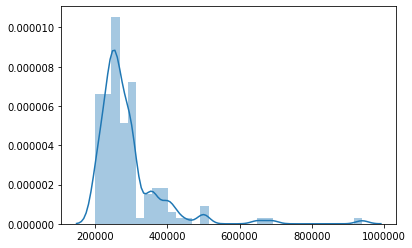

In [9]:
sns.distplot(np.array(placed_df['salary']))

In [10]:
df.shape

(215, 15)

So we have 215 entries and 15 features to judge them.

In [11]:
df.groupby('degree_t')['status'].value_counts()

degree_t   status    
Comm&Mgmt  Placed        102
           Not Placed     43
Others     Not Placed      6
           Placed          5
Sci&Tech   Placed         41
           Not Placed     18
Name: status, dtype: int64

In [12]:
df.status.value_counts().Placed#total placed.

148

In [13]:
df.groupby('workex')["status"].value_counts().unstack()
#now we would like to viualize the feature co relation with one another.

status,Not Placed,Placed
workex,,
No,57,84
Yes,10,64


In [14]:
df['status'] = df['status'].replace(['Placed'],1)
df['status'] = df['status'].replace(['Not Placed'],0)

df['gender'] = df['gender'].replace(['M'],1)
df['gender'] = df['gender'].replace(['F'],0)

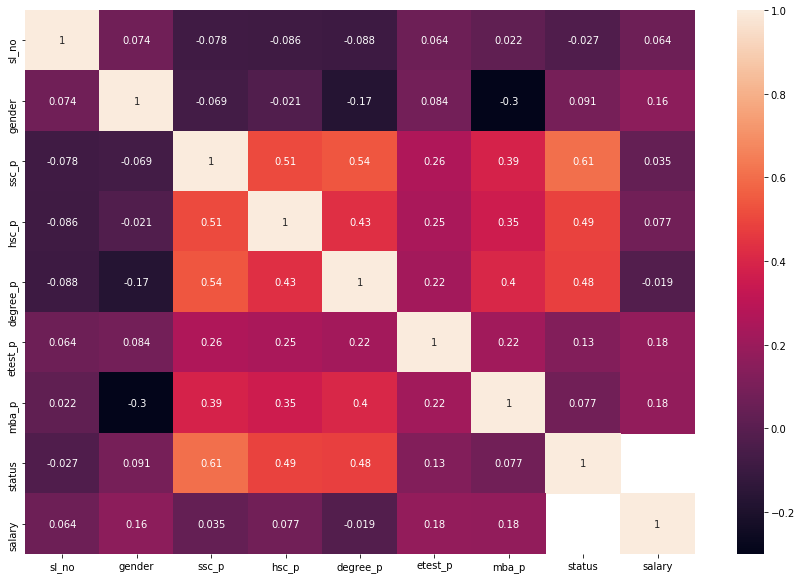

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot = True)
 

1.salary is highly corelated with mba_p and etest_p.

2.mba_p is also corelated with etest_p as well as hsc_p and ssc  _p, but salary not so much.

3.whether Placed or not depends mainly on ssc_p,hsc_p,degree_p.

4. Status is not so dependent on gender but salary depends on gender.



In [16]:
df= pd.get_dummies(df[["sl_no", "gender", "ssc_p","ssc_b","hsc_p","hsc_b","hsc_s","degree_p","degree_t","workex","etest_p","specialisation","mba_p",'status',"salary"]])
#we have categorical values.

In [17]:
# Splitting data into X and y we are tackling the problem whwther you will be placed or not.

X = df.drop(["sl_no","status","salary"], axis=1)
y = df["status"]

In [18]:

model1=LogisticRegression(max_iter=1000)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_preds=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix_test=confusion_matrix(y_true=y_test,y_pred=y_preds)
print(conf_matrix_test)
model1.score(X_test,y_test)

[[11  6]
 [ 3 34]]


0.8333333333333334

In [20]:
conf_matrix_train=confusion_matrix(y_true=y_train,y_pred=model1.predict(X_train))
print(conf_matrix_train)
model1.score(X_train,model1.predict(X_train))
#if we allow logistic regression to converge it overfits the data same problem with Random forest.


[[ 43   7]
 [  6 105]]


1.0

In [21]:
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)              

In [22]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "gnb" : GaussianNB(),
          "decision_tree" : DecisionTreeClassifier(random_state=0, max_depth=2)}

In [23]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):   
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8461538461538461,
 'KNN': 0.7846153846153846,
 'Random Forest': 0.7846153846153846,
 'gnb': 0.8307692307692308,
 'decision_tree': 0.7538461538461538}

In [25]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_train,y_train=y_train,y_test=y_train)
model_scores
#Checking overfitting


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.9066666666666666,
 'KNN': 0.9,
 'Random Forest': 1.0,
 'gnb': 0.8533333333333334,
 'decision_tree': 0.8866666666666667}

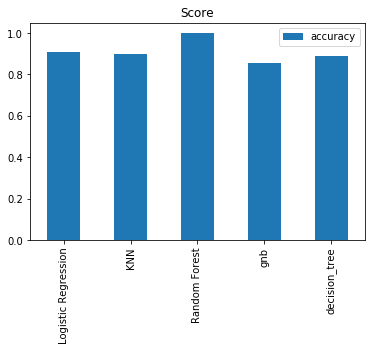

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(title="Score");

#Feature Importance for getting Placed

In [27]:
# Finding constants LogisticRegression
modelSelected= LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

modelSelected.fit(X_train, y_train);
print(modelSelected.coef_)

y_pred = modelSelected.predict(X_test)
y_pred


[[ 0.1444417   0.22005514  0.09599851  0.06057507 -0.06940689 -0.28398167
  -0.20864054  0.02876432 -0.13757324 -0.04230298  0.13072145 -0.35092136
   0.04032368  0.11104349 -0.10139217 -0.18952754 -0.68211265  0.50223642
   0.14683752 -0.32671374]]


array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [28]:
# Match coef's of features to columns
feature_dict = dict(zip(X.columns, list(modelSelected.coef_[0])))
feature_dict

{'gender': 0.14444170470553613,
 'ssc_p': 0.22005514252480043,
 'hsc_p': 0.09599850999442483,
 'degree_p': 0.06057507121068544,
 'etest_p': -0.06940688609786852,
 'mba_p': -0.28398167235899907,
 'ssc_b_Central': -0.20864054339715737,
 'ssc_b_Others': 0.0287643209523408,
 'hsc_b_Central': -0.1375732441606094,
 'hsc_b_Others': -0.04230297828420785,
 'hsc_s_Arts': 0.13072145226368959,
 'hsc_s_Commerce': -0.35092135919053974,
 'hsc_s_Science': 0.04032368448203335,
 'degree_t_Comm&Mgmt': 0.11104348831671554,
 'degree_t_Others': -0.10139217093546866,
 'degree_t_Sci&Tech': -0.1895275398260641,
 'workex_No': -0.6821126457436327,
 'workex_Yes': 0.5022364232988163,
 'specialisation_Mkt&Fin': 0.1468375162586391,
 'specialisation_Mkt&HR': -0.3267137387034558}

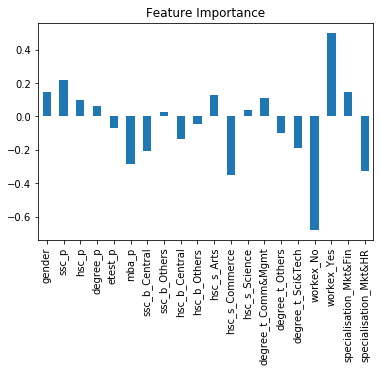

In [29]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);


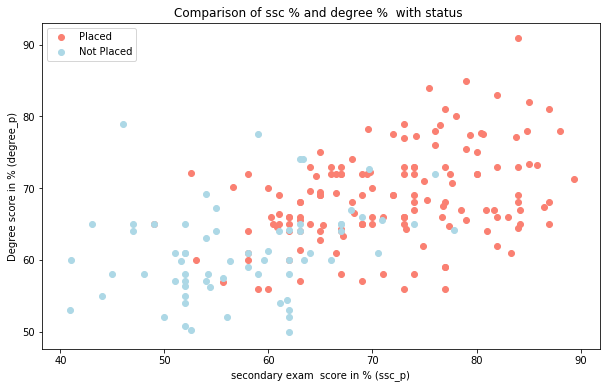

In [30]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.ssc_p[df.status==1],
            df.degree_p[df.status==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.ssc_p[df.status==0],
            df.degree_p[df.status==0],
            c="lightblue")


plt.title("Comparison of ssc % and degree %  with status ")
plt.xlabel("secondary exam  score in % (ssc_p)")
plt.ylabel("Degree score in % (degree_p)")
plt.legend(["Placed", "Not Placed"])

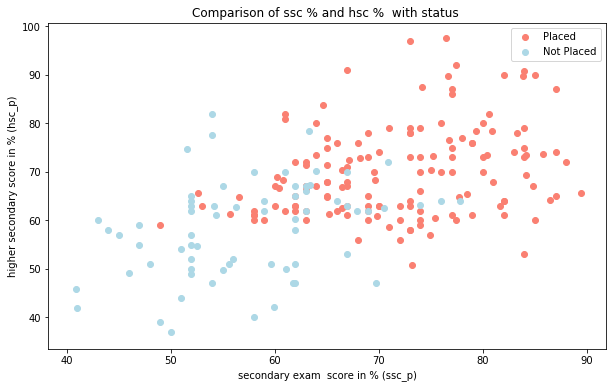

In [31]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.ssc_p[df.status==1],
            df.hsc_p[df.status==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.ssc_p[df.status==0],
            df.hsc_p[df.status==0],
            c="lightblue")


plt.title("Comparison of ssc % and hsc %  with status ")
plt.xlabel("secondary exam  score in % (ssc_p)")
plt.ylabel("higher secondary score in % (hsc_p)")
plt.legend(["Placed", "Not Placed"]);

#From above data we can say that people with work experience have 86% ( 64 placed out of 74) of getting placed

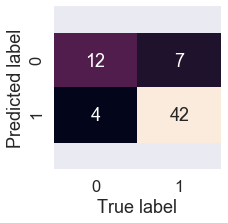

In [32]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_pred)